In [18]:
using JLD
using Dates
using PyPlot


mr  = include("../../Tools/Model_Reduction_Dev.jl")
at  = include("../../Tools/AnalysisToolbox.jl")
kmr = include("KSE_modredTools.jl")

Main.KSE_modredTools

### Load and save information

In [6]:
server = startswith(pwd(), "/u5/jaredm") ? true : false
println("on server = $server")
# sol_file = server ? "../../../data/KSE_Data/KSE_sol$Exp.jld" :
#    "Examples/KSE/Data/KSE_sol$Exp.jld"
# println("Sol save location: " * sol_file)
# wf_file = server ? "../../../data/KSE_Data/KSE_wf$Exp-Mo$M_out.jld" :
#    "Examples/KSE/Data/KSE_wf$Exp-Mo$M_out.jld"

# When I want the standard lin et al. (2017) data.
sol_file = server ? "../../../data/KSE_Data/KSE_sol_lin1.jld" :
   "Examples/KSE/Data/KSE_sol_lin.jld"

on server = true


"../../../data/KSE_Data/KSE_sol_lin1.jld"

## Load data

In [ ]:
@time Data = load(sol_file)
print("Data Loaded")
uu = Data["dat_uu"]
vv = Data["dat_vv"]
tt = Data["dat_tt"]

obs_gap = Data["obs_gap"]
h       = Data["h"]
P      = Data["P"]
N      = Data["N"]
d = 5

In [15]:
M_out = 100
Δt = h*obs_gap

par = 1500
nfft = 2^12

Psi(x) = kmr.PSI(x; h, obs_gap, P, N)

Psi (generic function with 1 method)

## Get observations

In [10]:
X = vv[2:d+1, 1:end]

5×500001 Array{Complex{Float64},2}:
 -73.4911+106.602im  -75.0373+105.738im  …  -9.94987-43.2958im
   -409.3+84.7447im  -414.239+79.4992im       -221.8+49.0733im
   164.86+210.838im    166.09+203.738im     -57.7592+95.383im
 -38.0952+11.1861im  -28.9891+4.78464im     -7.17876+57.3711im
 -35.8533+62.8729im  -31.5592+65.201im        17.782+60.4354im

## Get Wiener Filter

In [16]:
@time h_wf = mr.get_wf(X, Psi; M_out, par, nfft, rl = false, PI = false)

Number of CKMS iterations: 6820
errK errR : 9.848219888213858e-11 3.2746787123590665e-15
245.150800 seconds (169.33 M allocations: 864.214 GiB, 3.01% gc time)
480.918296 seconds (411.77 M allocations: 951.505 GiB, 2.25% gc time)


5×25×100 Array{Complex{Float64},3}:
[:, :, 1] =
  755.809+16.8891im  -7.99654-19.2875im   …   0.000229118+3.43085e-5im
 -227.292-16.5817im   795.051+26.4794im       -0.00263107+0.00133284im
 -37.5646-24.1439im  -139.802+15.4142im       -0.00137725-0.00182692im
 -77.6234+7.29484im  -50.4557+26.1065im      -0.000797737+0.00113539im
 -18.0482+17.2948im   2.66778+0.449045im       2.64165e-5-0.0002416im

[:, :, 2] =
 -1569.82-38.3815im   23.3827+41.5954im  …  -0.000655757-0.0001421im
  506.821+30.7912im  -1648.16-61.4393im       0.00745587-0.00334468im
  86.1736+74.0488im   334.109-42.6377im       0.00385627+0.005217im
  152.451-23.3338im   103.221-56.9231im       0.00218827-0.00303165im
  37.5742-37.2256im  -5.77793-2.23601im      -5.88645e-5+0.000668121im

[:, :, 3] =
  719.315+19.3151im  -16.0441-20.9664im  …  0.000510602+0.000159712im
  -253.09-10.9498im   758.744+32.5812im     -0.00576747+0.00221613im
 -43.3236-53.5248im  -185.296+34.4566im     -0.00296839-0.00411608im
 -61.0435+16.407

# Run Reduced model

## Find Cut off

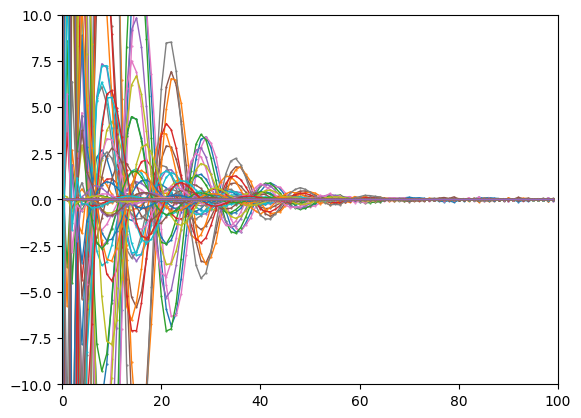

/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.8/dist-packages/numpy/

In [30]:
for i = 1:5
    for j = 1:25
        plot(h_wf[i,j,:],".-",lw = 1,ms = 1)
        axis([0,100,-10,10])
    end
end

